In [ ]:
import numpy as np
import pylab as plb
%pylab inline

from sklearn import linear_model
from numpy.random import permutation

#from sklearn.decomposition import MiniBatchDictionaryLearning
#from sklearn.feature_extraction.image import extract_patches_2d
#from sklearn.feature_extraction.image import reconstruct_from_patches_2d

Populating the interactive namespace from numpy and matplotlib


In [ ]:
def norm_1(original,reconstructed):
    # reshape input to one dimensional arrays
    d = np.reshape(original,-1)
    r = np.reshape(reconstructed,-1)

    norm = 1. - abs(np.dot(d,r))/np.linalg.norm(d)/np.linalg.norm(r)
    return norm

def norm_2(original,reconstructed):
    # reshape input to one dimensional arrays
    d = np.reshape(original,-1)
    r = np.reshape(reconstructed,-1)

    norm = np.linalg.norm(d-r)
    return norm

def norm_3(original,reconstructed):
    # reshape input to one dimensional arrays
    d = np.reshape(original,-1)
    r = np.reshape(reconstructed,-1)

    norm = np.linalg.norm(d-r)/np.linalg.norm(d)
    return norm

# Discrete Cosine basis

In [ ]:
Vdct = np.full((100,100),0.)
ps = 100
N1 = ps
N2 = ps
for n1 in range(N1):
    for i in range(ps):
            Vdct[n1,i] = cos(np.pi/N1*(i+1/2)*(n1))
Vdct = Vdct.T/sqrt(50.)            

In [ ]:
print(np.dot(Vdct[:,1],Vdct[:,2]))
print(np.dot(Vdct[1,:],Vdct[0,:]))

-1.04083408559e-16
0.01


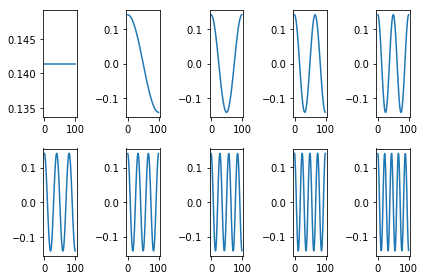

In [ ]:
for i,comp in enumerate(Vdct.T[:10]):
    subplot(2,5,1+i)
    plot(comp)
tight_layout()    

In [ ]:
np.dot(Vdct[:,0],Vdct[:,0])

2.0

# Simple function

In [ ]:
# create random (bandlimited) functions of given sparsity s = number of nonzero components
from sklearn.linear_model import LassoLarsIC
def sig_gen(Vdct,s,l):
    '''generate a discrete function of sparsity s in basis and band limit l'''
    comp = np.full((100,1),0.)
    sel = sorted(permutation(l)[:s])
    for i in range(s):
        comp[sel[i]] = (rand()-0.5)*2
    signal = np.dot(Vdct,comp)       
    return signal,comp

def sig_rec(Vdct,signal,nmeas):
    '''this function reconstructs the basis representation of signal, 
    in the basis Vdct from nmeas random measurements'''
    rm = sorted(permutation(100)[:nmeas])

    clf1 = linear_model.Lasso(alpha = 0.0001,copy_X=True)
    clf2 = linear_model.LinearRegression(copy_X=True)

    clf1.fit(Vdct[rm],signal[rm])
    clf2.fit(Vdct[rm],signal[rm])

    rec1 = clf1.predict(Vdct)
    rec2 = clf2.predict(Vdct)
    return rec1,rec2,rm

def sig_rec2(Vdct,signal,nmeas,l=0.0001):
    '''this function reconstructs the basis representation of signal, 
    in the basis Vdct from nmeas random measurements'''
    rm = sorted(permutation(100)[:nmeas])

    clf1 = linear_model.Lasso(alpha = l,copy_X=True)
    clf2 = linear_model.LinearRegression(copy_X=True)
    #clf3 = LassoLarsIC(criterion='aic',)

    clf1.fit(Vdct[rm],signal[rm])
    clf2.fit(Vdct[rm],signal[rm])
    #clf3.fit(Vdct[rm],signal[rm])
    
    rec1 = clf1.predict(Vdct)
    rec2 = clf2.predict(Vdct)
    return rec1,rec2,rm#,clf3.alpha_

def sig_rec3(Vdct,signal,nmeas,l=0.0001):
    '''this function reconstructs the basis representation of signal, 
    in the basis Vdct from nmeas random measurements'''
    rm = sorted(permutation(100)[:nmeas])

    clf1 = linear_model.LassoLarsIC(criterion='aic',copy_X=True)
    clf2 = linear_model.LinearRegression(copy_X=True)
    #clf3 = LassoLarsIC(criterion='aic',)

    clf1.fit(Vdct[rm],signal[rm])
    clf2.fit(Vdct[rm],signal[rm])
    #clf3.fit(Vdct[rm],signal[rm])
    
    rec1 = clf1.predict(Vdct)
    rec2 = clf2.predict(Vdct)
    return rec1,rec2,rm,clf1.alpha_

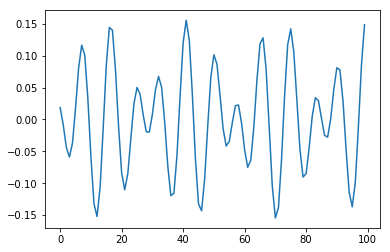

In [ ]:
s = 2
l = 40
signal,c = sig_gen(Vdct,s,l)
plot(signal)

In [ ]:
#Signal Reconstruction with AIC and Linear Regression
l = 40
Nave = 2
s_list = [3]
nmeas_list = [100,90,80,70,60,50,40,30,20,15,10,5,2,1]
lambda_list = [1]#[0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001,0.0000005,0.0000001,0.00000005,0.00000001,0]
ntemp = np.full((Nave,7),0.)
#results will store s,nmeas,rec1_norm1,rec1_norm2,rec1_norm3,rec2_norm1,rec2_norm2,rec2_norm3
res = np.full((len(s_list)*len(nmeas_list)*len(lambda_list),10),0.)
jj=-1
for lam in lambda_list:
    for s in s_list:
        for nmeas in nmeas_list:
            jj+=1
            for k in range(Nave):
                signal,c = sig_gen(Vdct,s,l)
                rec1,rec2,rm,alpha = sig_rec3(Vdct,signal,nmeas,lam)
                ntemp[k]=[norm_1(signal,rec1),norm_2(signal,rec1),
                          norm_3(signal,rec1),norm_1(signal,rec2),norm_2(signal,rec2),norm_3(signal,rec2),alpha]

            res[jj,:3] = s,lam,nmeas
            res[jj,3:] = np.mean(ntemp,0)
            
#plot(rec1)
#plot(rec2)
#plot(res[:,],signal[rm],'o')

print((norm_1(signal,rec1),norm_2(signal,rec1),norm_3(signal,rec1)))
print((norm_1(signal,rec2),norm_2(signal,rec2),norm_3(signal,rec2)))

(1.0, 1.1156904304487847, 1.9315879364888944)
(1.0, 1.1156904304487847, 1.9315879364888944)


/Users/manuelmai/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Signal rec with Lasso and LinearRegression
l = 40
Nave = 100
s_list = [1,2,3,4,5,10,15,20,30]
nmeas_list = [100,90,80,70,60,50,40,30,20,15,10,5,2,1]
lambda_list = [0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001,0.0000005,0.0000001,0.00000005,0.00000001,0]
ntemp = np.full((Nave,6),0.)
#results will store s,nmeas,rec1_norm1,rec1_norm2,rec1_norm3,rec2_norm1,rec2_norm2,rec2_norm3
res = np.full((len(s_list)*len(nmeas_list)*len(lambda_list),9),0.)
jj=-1
for lam in lambda_list:
    for s in s_list:
        for nmeas in nmeas_list:
            jj+=1
            for k in range(Nave):
                signal,c = sig_gen(Vdct,s,l)
                rec1,rec2,rm = sig_rec2(Vdct,signal,nmeas,lam)
                ntemp[k]=[norm_1(signal,rec1),norm_2(signal,rec1),
                          norm_3(signal,rec1),norm_1(signal,rec2),norm_2(signal,rec2),norm_3(signal,rec2)]

            res[jj,:3] = s,lam,nmeas
            res[jj,3:] = np.mean(ntemp,0)

/Users/manuelmai/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
/Users/manuelmai/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/manuelmai/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:36: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/manuelmai/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


In [ ]:
jj

2015

In [ ]:
l = 40
Nave = 200
s_list = [1,2,3,4,5,10,15,20,30]
nmeas_list = [100,90,80,70,60,50,40,30,20,15,10,5,2,1]
ntemp = np.full((Nave,6),0.)
#results will store s,nmeas,rec1_norm1,rec1_norm2,rec1_norm3,rec2_norm1,rec2_norm2,rec2_norm3
res = np.full((len(s_list)*len(nmeas_list),8),0.)
jj=-1

for s in s_list:
    for nmeas in nmeas_list:
        jj+=1
        for k in range(Nave):
            signal,c = sig_gen(Vdct,s,l)
            rec1,rec2,rm = sig_rec(Vdct,signal,nmeas)
            ntemp[k]=[norm_1(signal,rec1),norm_2(signal,rec1),
                      norm_3(signal,rec1),norm_1(signal,rec2),norm_2(signal,rec2),norm_3(signal,rec2)]

        res[jj,:2] = s,nmeas
        res[jj,2:] = np.mean(ntemp,0)

#plot(rec1)
#plot(rec2)
#plot(res[:,],signal[rm],'o')

print((norm_1(signal,rec1),norm_2(signal,rec1),norm_3(signal,rec1)))
print((norm_1(signal,rec2),norm_2(signal,rec2),norm_3(signal,rec2)))

/Users/manuelmai/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(0.99004763079614289, 4.3673606824788695, 1.3442867322270078)
(0.99004763079614289, 4.3673606824788695, 1.3442867322270078)


In [ ]:
res

array([[  1.00000000e+00,   1.00000000e-01,   1.00000000e+02, ...,
          2.81075467e-15,   5.40792950e-15,   4.96869019e-03],
       [  1.00000000e+00,   1.00000000e-01,   9.00000000e+01, ...,
          1.66975967e-01,   3.08556163e-01,   5.54874923e-03],
       [  1.00000000e+00,   1.00000000e-01,   8.00000000e+01, ...,
          2.51307887e-01,   4.47276055e-01,   6.10593513e-03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

# Data Analysis

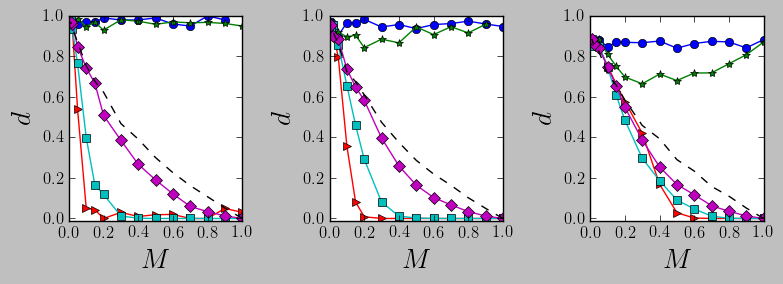

In [ ]:
from matplotlib import rc
mpl.style.use('classic')
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

symb = ['o-','*-','>-','s-','D-','p-','^-','o--','*--','>--','s--','D--','p--','^--']
# for fixed s plot L1,L2 vs Nmeas
# for s = 1
figure(figsize=(8,3))
lambda_list = [0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001,0.0000005,0.0000001,0.00000005,0.00000001,0] #[1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0]
lambda_list = [0.1,0.01,0.0001,0.000001,0.00000001]#,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001,0.0000005,0.0000001,0.00000005,0.00000001,0]
for j,s in enumerate([1,3,20]):
    subplot(1,3,1+j)
    
    for i,lam in enumerate(lambda_list):
        nmeas_l = array([res[i,2] for i in range(len(res[:,0])) if (res[i,0]==s and res[i,1]==lam)])

        l1_1 = array([res[i,3] for i in range(len(res[:,0])) if (res[i,0]==s and res[i,1]==lam)])
        l2_1 = array([res[i,6] for i in range(len(res[:,0])) if (res[i,0]==s and res[i,1]==lam)])

        l1_2 = array([res[i,4] for i in range(len(res[:,0])) if (res[i,0]==s and res[i,1]==lam)])
        l2_2 = array([res[i,7] for i in range(len(res[:,0])) if (res[i,0]==s and res[i,1]==lam)])

        l1_3 = array([res[i,5] for i in range(len(res[:,0])) if (res[i,0]==s and res[i,1]==lam)])
        l2_3 = array([res[i,8] for i in range(len(res[:,0])) if (res[i,0]==s and res[i,1]==lam)])

        #print(simps(l1_1, nmeas_l))
        #print(simps(l2_1, nmeas_l))
        
        
        plot(nmeas_l/100.,l1_1,symb[i])
        #legend(['L1 rec','L2 rec'])
        xlabel('$M$',size='20')
        ylabel('$d$',size='20')
        tick_params(axis='both', which='major', labelsize=12)
        ylim(-0.01,1)
        #title('s ='+str(s),size='20')
    plot(nmeas_l/100.,l2_1,'k--')

tight_layout()
savefig("ofd/intro_L1_L2_s.pdf", transparent=True)

In [ ]:
len(res[:,9])

2016

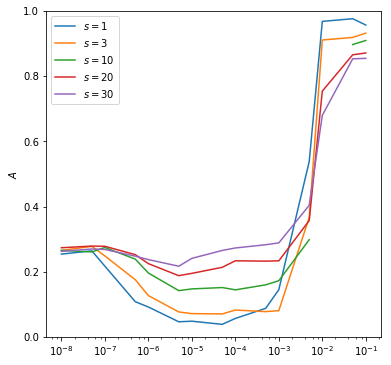

In [ ]:
# find area under the curve
from scipy.integrate import simps

lambda_list = [0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0.000005,0.000001,0.0000005,0.0000001,0.00000005,0.00000001] #[1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001,0]
s_list = [1,3,10,20,30]
area = np.full((len(s_list)*len(lambda_list),4),0.)
jj=-1
for j,s in enumerate(s_list):
    for lam in lambda_list:
        jj+=1
        nmeas_l = array([res[i,2] for i in range(len(res[:,0])) if (res[i,0]==s and res[i,1]==lam)])

        l1_1 = array([res[i,3] for i in range(len(res[:,0])) if (res[i,0]==s and res[i,1]==lam)])
        l2_1 = array([res[i,6] for i in range(len(res[:,0])) if (res[i,0]==s and res[i,1]==lam)])
        area[jj,:] = [lam,s,abs(simps(l1_1, nmeas_l/100)),abs(simps(l2_1, nmeas_l/100))]
        
figure(figsize=(6,6))        
for j,s in enumerate(s_list):
    lams = array([area[i,0] for i in range(len(area[:,0])) if area[i,1]==s])

    l1_1 = array([area[i,2] for i in range(len(area[:,0])) if area[i,1]==s])
    l2_1 = array([area[i,3] for i in range(len(area[:,0])) if area[i,1]==s])
    #alph = [area[i,4] for i in range(len(area[:,0])) if area[i,1]==s][0]
    #norm = [area[i,2] for i in range(len(area[:,0])) if area[i,1]==s][0]
    plb.plot(lams,l1_1)
    plb.xscale('log')
    ylim(0,1.)
legend(["$s = 1$","$s = 3$","$s = 10$","$s = 20$","$s = 30$"],loc=2)   
#xlabel("'lambda'")
ylabel("$A$")

array([[  1.00000000e-01,   1.00000000e+00,              nan,
          3.45860415e-01],
       [  5.00000000e-02,   1.00000000e+00,   9.68139167e-01,
          3.43743815e-01],
       [  1.00000000e-02,   1.00000000e+00,   9.56619738e-01,
          3.44340543e-01],
       [  5.00000000e-03,   1.00000000e+00,              nan,
          3.45121193e-01],
       [  1.00000000e-03,   1.00000000e+00,   1.39704412e-01,
          3.44188373e-01],
       [  5.00000000e-04,   1.00000000e+00,   1.01035248e-01,
          3.45872062e-01],
       [  1.00000000e-04,   1.00000000e+00,   5.48977213e-02,
          3.43105739e-01],
       [  5.00000000e-05,   1.00000000e+00,   4.19776072e-02,
          3.44337870e-01],
       [  1.00000000e-05,   1.00000000e+00,   4.78383381e-02,
          3.43454503e-01],
       [  5.00000000e-06,   1.00000000e+00,   4.73531661e-02,
          3.43468480e-01],
       [  1.00000000e-06,   1.00000000e+00,   9.60039418e-02,
          3.47792547e-01],
       [  5.00000000e

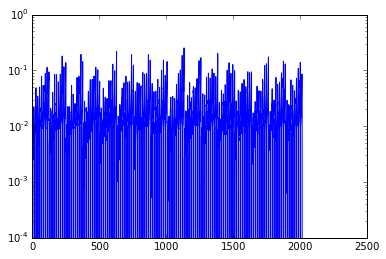

In [ ]:
plot(res[:,9])
yscale('log')

In [ ]:
def integral(y,x):
    sum = 0
    for i in range(1,len(x)):
        sum += 1/2*(y[i]+y[i-1])*(x[i]-x[i-1])
    return sum

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

//anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


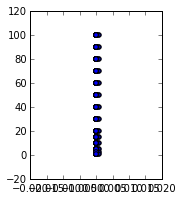

In [ ]:
# for fixed s plot L1,L2 vs Nmeas
# for s = 1
figure(figsize=(8,3))

for j,s in enumerate([1,3,20]):
    nmeas_l = array([res[i,1] for i in range(len(res[:,0])) if res[i,0]==s])

    l1_1 = array([res[i,2] for i in range(len(res[:,0])) if res[i,0]==s])
    l2_1 = array([res[i,5] for i in range(len(res[:,0])) if res[i,0]==s])

    l1_2 = array([res[i,3] for i in range(len(res[:,0])) if res[i,0]==s])
    l2_2 = array([res[i,6] for i in range(len(res[:,0])) if res[i,0]==s])

    l1_3 = array([res[i,4] for i in range(len(res[:,0])) if res[i,0]==s])
    l2_3 = array([res[i,7] for i in range(len(res[:,0])) if res[i,0]==s])
    
    
    subplot(1,3,1+j)
    scatter(nmeas_l/100.,l1_1)
    scatter(nmeas_l/100.,l2_1,'--')
    #legend(['L1 rec','L2 rec'])
    xlabel('$M$',size='20')
    ylabel('$d$',size='20')
    tick_params(axis='both', which='major', labelsize=12)
    ylim(-0.01,1)
    #title('s ='+str(s),size='20')

tight_layout()
#savefig("ofd/intro_L1_L2_s.pdf")

In [ ]:
pwd

'/Users/mm2443/Documents/Research/Diseasemodelling/ODEs from data'

# one instance of original/L1/L2 for various %measurements

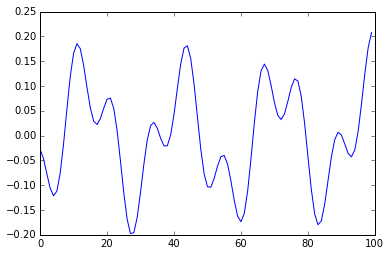

In [ ]:
s = 3
signal,c = sig_gen(Vdct,s,l)
plot(signal)

In [ ]:
c.T

array([[ 0.        ,  0.        ,  0.08357993,  0.        ,  0.        ,
         0.        ,  0.        , -0.83594595,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.57748094,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [ ]:
for i in range(99):
    if c[i]!=0.:
        print(i)

2
7
18


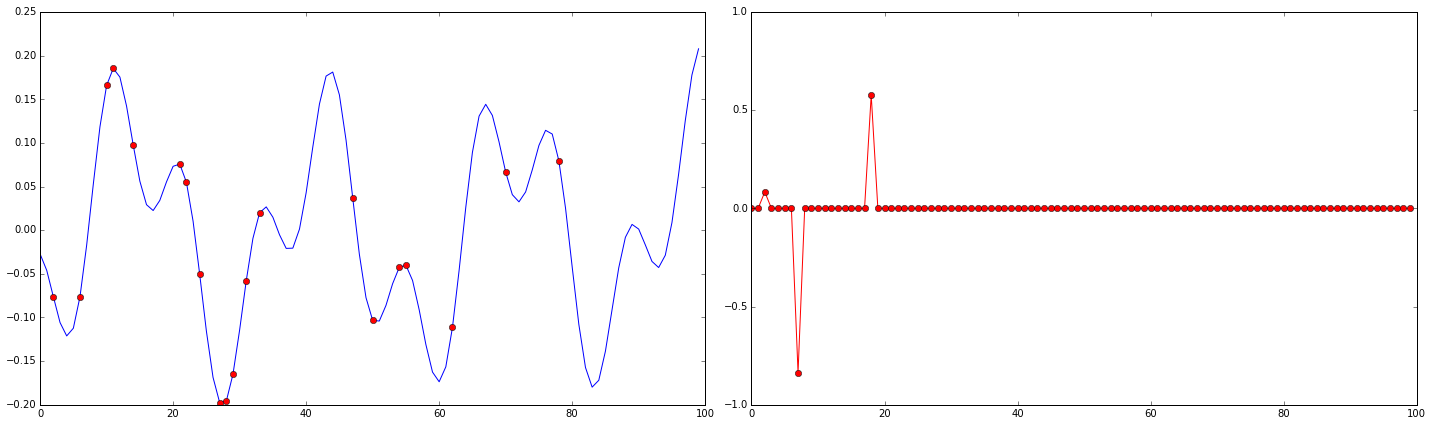

In [ ]:
rm = sorted(permutation(100)[:20])
figure(figsize=(20,6))
subplot(1,2,1)
plot(signal)
plot(rm,signal[rm],'ro')
subplot(1,2,2)
ylim(-1,1)
plot(c,'r-o')
savefig("sparse_signal.pdf",transparent=True)
tight_layout()

In [ ]:
pwd


'/Users/mm2443/Documents/Research/Diseasemodelling/ODEs from data'

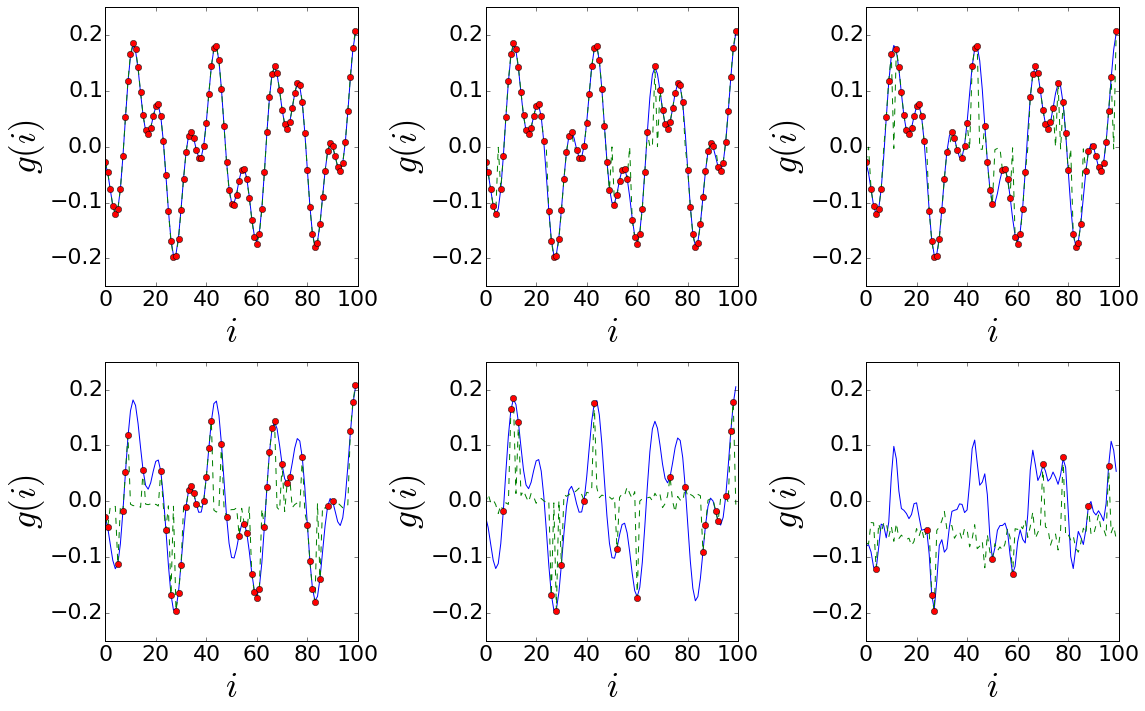

In [ ]:
#s = 3
nmeas_list = [100,90,80,50,20,10]
figure(figsize = (16,10))
for i,nmeas in enumerate(nmeas_list):
    subplot(2,3,1+i)
    rec1,rec2,rm = sig_rec(Vdct,signal,nmeas)
    #plot(signal,'--')
    plot(rec1)
    plot(rec2,'g--')
    plot(rm,signal[rm],'ro')
    ylabel("$g(i)$",size='35')
    xlabel("$i$",size='35')
    ylim(-0.25,0.25)
    tick_params(axis='both', which='major', labelsize=22)
    #legend(['signal',"L1 rec","L2 rec","Data"])
    #legend(["$L_1$ rec","$L_2$ rec","Data"])
    #title("# Measurements = " +str(nmeas),size=20)
tight_layout()    
#savefig("ofd/intro_L1_L2_example.pdf")

In [ ]:
pwd

'/Users/mm2443/Documents/Research/Diseasemodelling/ODEs from data'

In [ ]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

//anaconda/envs/py3/lib/python3.4/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10


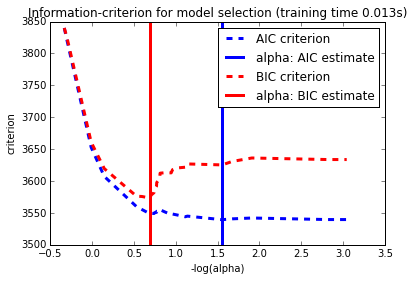

In [ ]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)